# PROJECT 3

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
# Given Url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Reading the data from the given url
df = pd.read_csv(url)
# Naming the columns of the dataframe
df.columns=['Age','WorkClass','FnlWgt','Education','EducationNum','Marital-Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-Per-Week','Native-Country','Income']
# Printing the rows of the dataframe
df.head()

,Age,WorkClass,FnlWgt,Education,EducationNum,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Defining a function to eliminate the blank spaces of the columns 
def trimAllColumns(df):
    trimStrings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trimStrings)
#Trimming out the blank spaces 
df = trimAllColumns(df)
df.head(2)


,Age,WorkClass,FnlWgt,Education,EducationNum,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
# Finding the shape of the database
df.shape

(32560, 15)

In [5]:
# Checking for the null values
df.isnull().any()

Age               False
WorkClass         False
FnlWgt            False
Education         False
EducationNum      False
Marital-Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital-gain      False
Capital-loss      False
Hours-Per-Week    False
Native-Country    False
Income            False
dtype: bool

In [6]:
# Finding out the unique values of the columns
for i in df.columns:
    print("\n",i,"\n","-"*50,"\n",df[i].unique())


 Age 
 -------------------------------------------------- 
 [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 WorkClass 
 -------------------------------------------------- 
 ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

 FnlWgt 
 -------------------------------------------------- 
 [ 83311 215646 234721 ...  34066  84661 257302]

 Education 
 -------------------------------------------------- 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 EducationNum 
 -------------------------------------------------- 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Marital-Status 
 -----------------------------------------

In [7]:
# We notice that certain missing values are found as "?"
# Finding the number of records comprising "?"
for i,j in zip(df.columns,(df.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

WorkClass: 1836 records
Occupation: 1843 records
Native-Country: 583 records


In [8]:
'''
Filling the missing values in each of the three columns by predicting their values
Values are predicted using all the attributes (including 'income') as independent variables and treat that column as the 
dependent variable, making it a multi-class classification task. 
Three classification algorithms, namely, logistic regression, decision trees and random forest  are used to predict the 
class when the value is missing (in this case a '?').Then a majority vote among the three classifiers is taken

'''
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [9]:
# Filling in missing values for Attribute workclass


test_data = df[(df.WorkClass.values == '?')].copy()
test_label = test_data.WorkClass

train_data = df[(df.WorkClass.values != '?')].copy()
train_label = train_data.WorkClass

test_data.drop(columns = ['WorkClass'], inplace = True)
train_data.drop(columns = ['WorkClass'], inplace = True)

train_data = train_data.apply(preprocessing.LabelEncoder().fit_transform)
test_data = test_data.apply(preprocessing.LabelEncoder().fit_transform)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = df.WorkClass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

df.loc[(df.WorkClass.values == '?'),'WorkClass'] = overall_pred.values
print(df.WorkClass.value_counts())
print(df.WorkClass.unique())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Private             24359
Self-emp-not-inc     2567
Local-gov            2110
State-gov            1305
Self-emp-inc         1117
Federal-gov           981
Never-worked          107
Without-pay            14
Name: WorkClass, dtype: int64
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']


In [10]:
# Filling in missing values for Occupation occupation

test_data = df[(df.Occupation.values == '?')].copy()
test_label = test_data.Occupation

train_data = df[(df.Occupation.values != '?')].copy()
train_label = train_data.Occupation

test_data.drop(columns = ['Occupation'], inplace = True)
train_data.drop(columns = ['Occupation'], inplace = True)

train_data = train_data.apply(preprocessing.LabelEncoder().fit_transform)
test_data = test_data.apply(preprocessing.LabelEncoder().fit_transform)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = df.Occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

df.loc[(df.Occupation.values == '?'),'Occupation'] = overall_pred.values
print(df.Occupation.value_counts())
print(df.Occupation.unique())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Prof-specialty       4917
Craft-repair         4435
Exec-managerial      4136
Adm-clerical         3951
Sales                3699
Other-service        3638
Machine-op-inspct    2007
Transport-moving     1598
Handlers-cleaners    1379
Farming-fishing      1056
Tech-support          935
Protective-serv       650
Priv-house-serv       150
Armed-Forces            9
Name: Occupation, dtype: int64
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [11]:
# Filling in missing values for Native-Country

test_data = df[(df['Native-Country'].values == '?')].copy()
test_label = test_data['Native-Country']

train_data = df[(df['Native-Country'].values != '?')].copy()
train_label = train_data['Native-Country']

test_data.drop(columns = ['Native-Country'], inplace = True)
train_data.drop(columns = ['Native-Country'], inplace = True)

train_data = train_data.apply(preprocessing.LabelEncoder().fit_transform)
test_data = test_data.apply(preprocessing.LabelEncoder().fit_transform)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = df['Native-Country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

df.loc[(df['Native-Country'].values == '?'),'Native-Country'] = overall_pred.values
print(df['Native-Country'].value_counts())
print(df['Native-Country'].unique())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


United-States                 29734
Mexico                          643
Philippines                     214
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            76
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            63
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

## EXPLORATORY DATA ANALYSIS

(32560, 15)
5
3


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


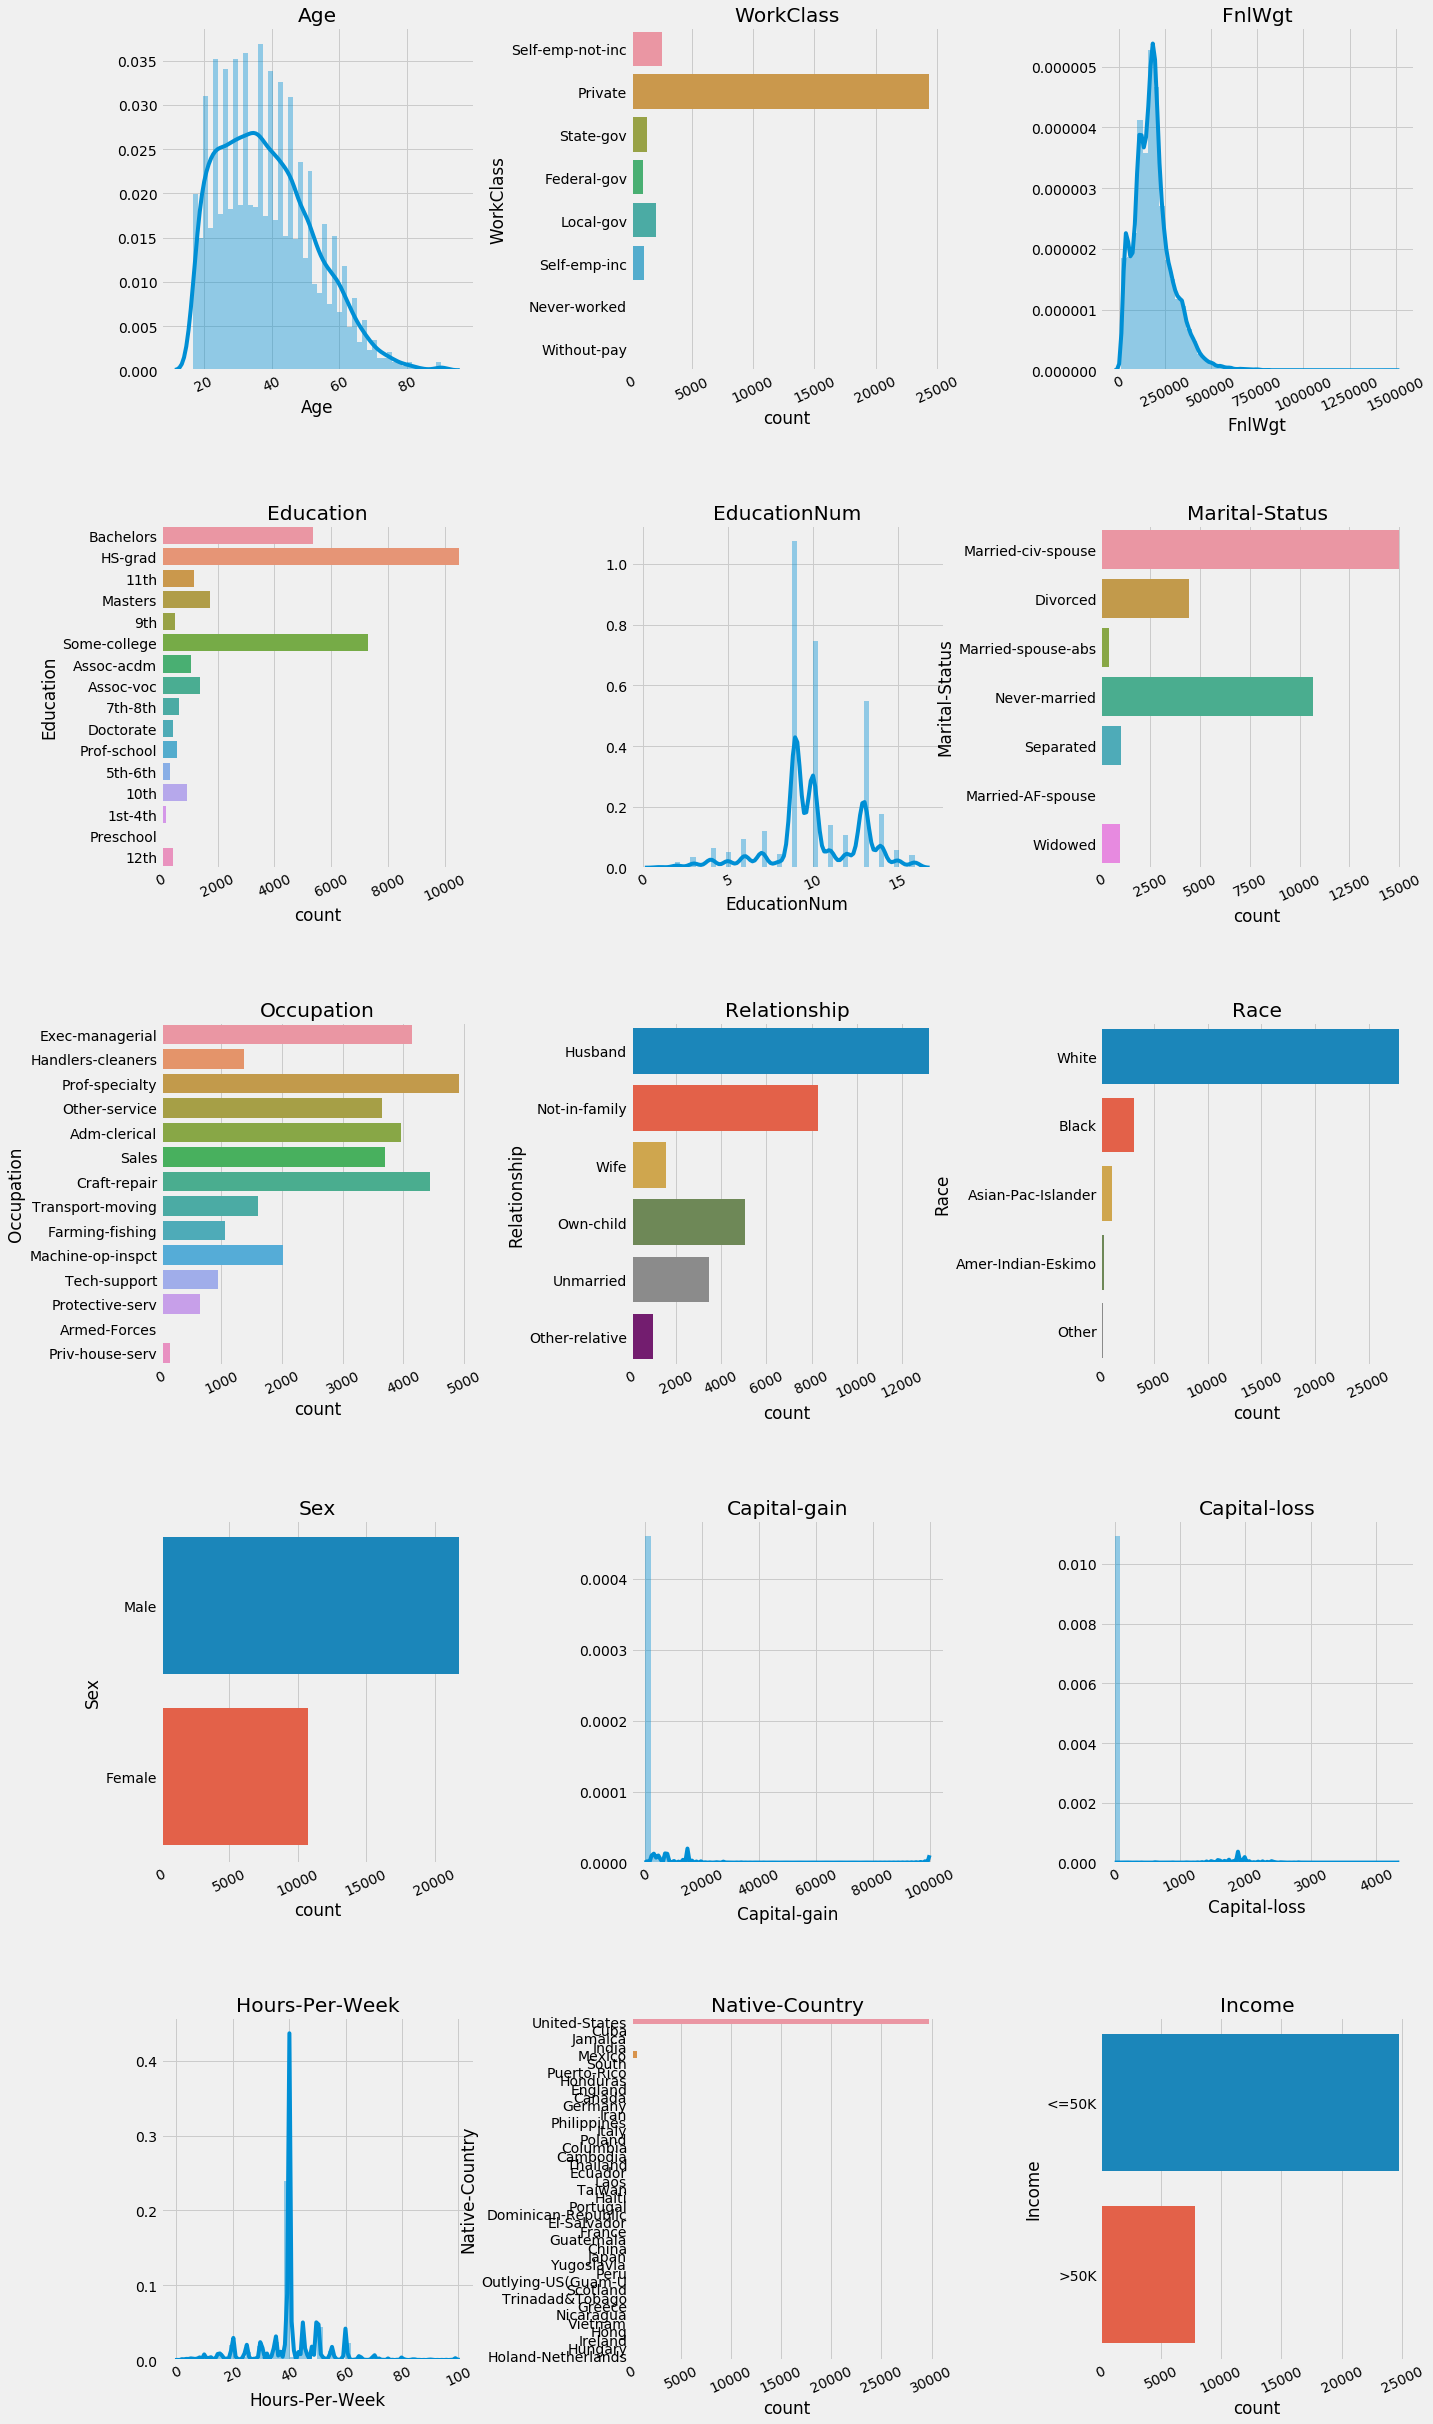

In [12]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Plotting the distribution of each column for a better analysis
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
                      
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))                  
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    print(dataset.shape)
    print(rows)
    print(cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            #print(g)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
    
    
plot_distribution(df, cols=3, width=20, height=40, hspace=0.45, wspace=0.5)

## EDUCATION Vs INCOME

In [13]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['EducationNum','Education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion of population')

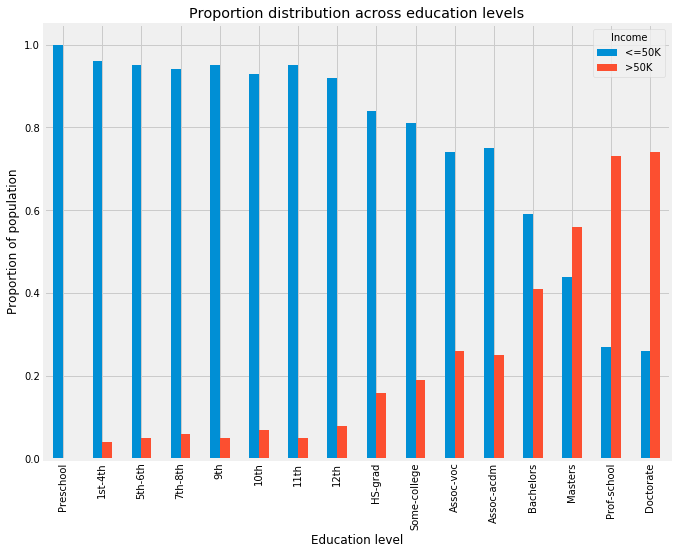

In [14]:
education = round(pd.crosstab(df.Education, df.Income).div(pd.crosstab(df.Education, df.Income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')


In [15]:
print("OBSERVATION:\n","-"*80)
print("We can observe that as the level of education increases, the income also increases.\nFrom Masters, the people earning >50k are a majority")


OBSERVATION:
 --------------------------------------------------------------------------------
We can observe that as the level of education increases, the income also increases.
From Masters, the people earning >50k are a majority


## GENDER Vs INCOME

Text(0, 0.5, 'Proportion of population')

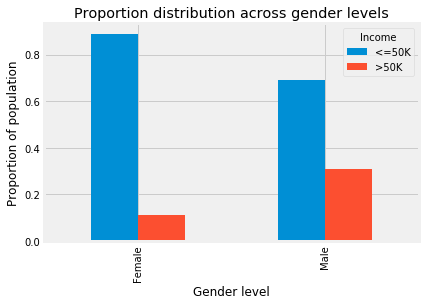

In [16]:
gender = round(pd.crosstab(df.Sex, df.Income).div(pd.crosstab(df.Sex, df.Income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [17]:
print("OBSERVATION:\n","-"*80)
print("We can observe a wage gap.\nThe proportion of males earning >50k is greater than that of the females.")

OBSERVATION:
 --------------------------------------------------------------------------------
We can observe a wage gap.
The proportion of males earning >50k is greater than that of the females.


Text(20.200000000000003, 0.5, 'Proportion of population')

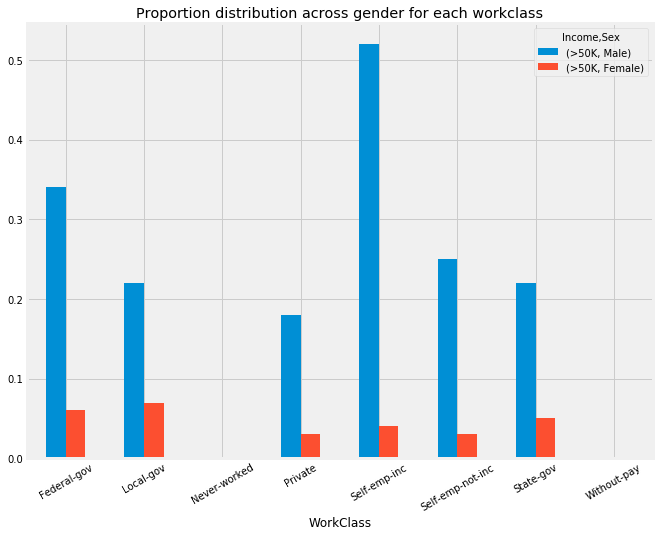

In [18]:
gender_workclass = round(pd.crosstab(df.WorkClass, [df.Income, df.Sex]).div(pd.crosstab(df.WorkClass, [df.Income, df.Sex]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

## OCCUPATION Vs INCOME

Text(0, 0.5, 'Proportion of population')

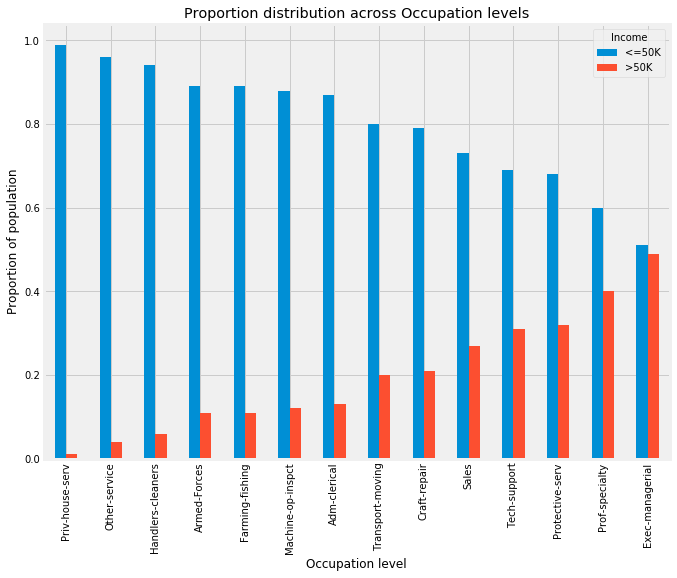

In [19]:
occupation = round(pd.crosstab(df.Occupation, df.Income).div(pd.crosstab(df.Occupation, df.Income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

## WORKCLASS Vs INCOME

Text(0, 0.5, 'Proportion of population')

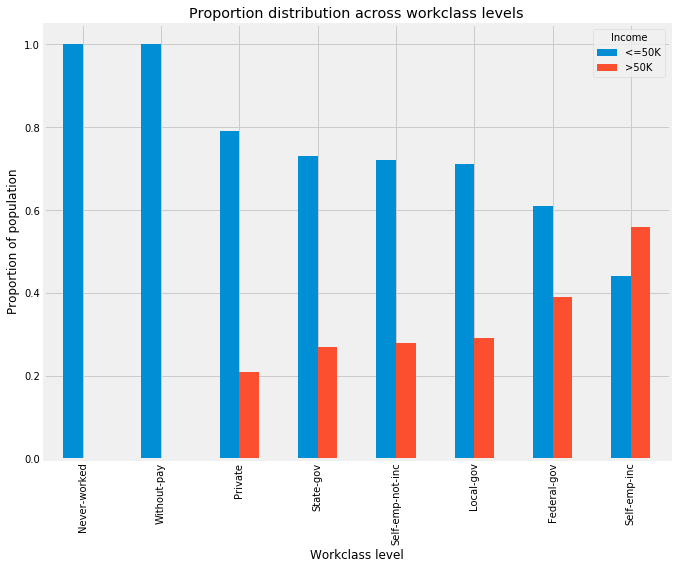

In [20]:
workclass = round(pd.crosstab(df.WorkClass, df.Income).div(pd.crosstab(df.WorkClass, df.Income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

## RACE Vs INCOME

Text(0, 0.5, 'Proportion of population')

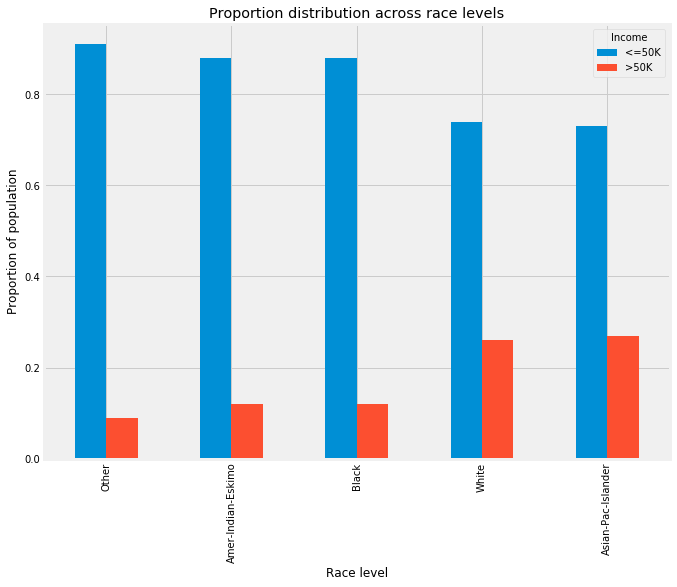

In [21]:
race = round(pd.crosstab(df.Race, df.Income).div(pd.crosstab(df.Race, df.Income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

## NATIVE COUNTRY Vs INCOME

Text(0, 0.5, 'Proportion of population')

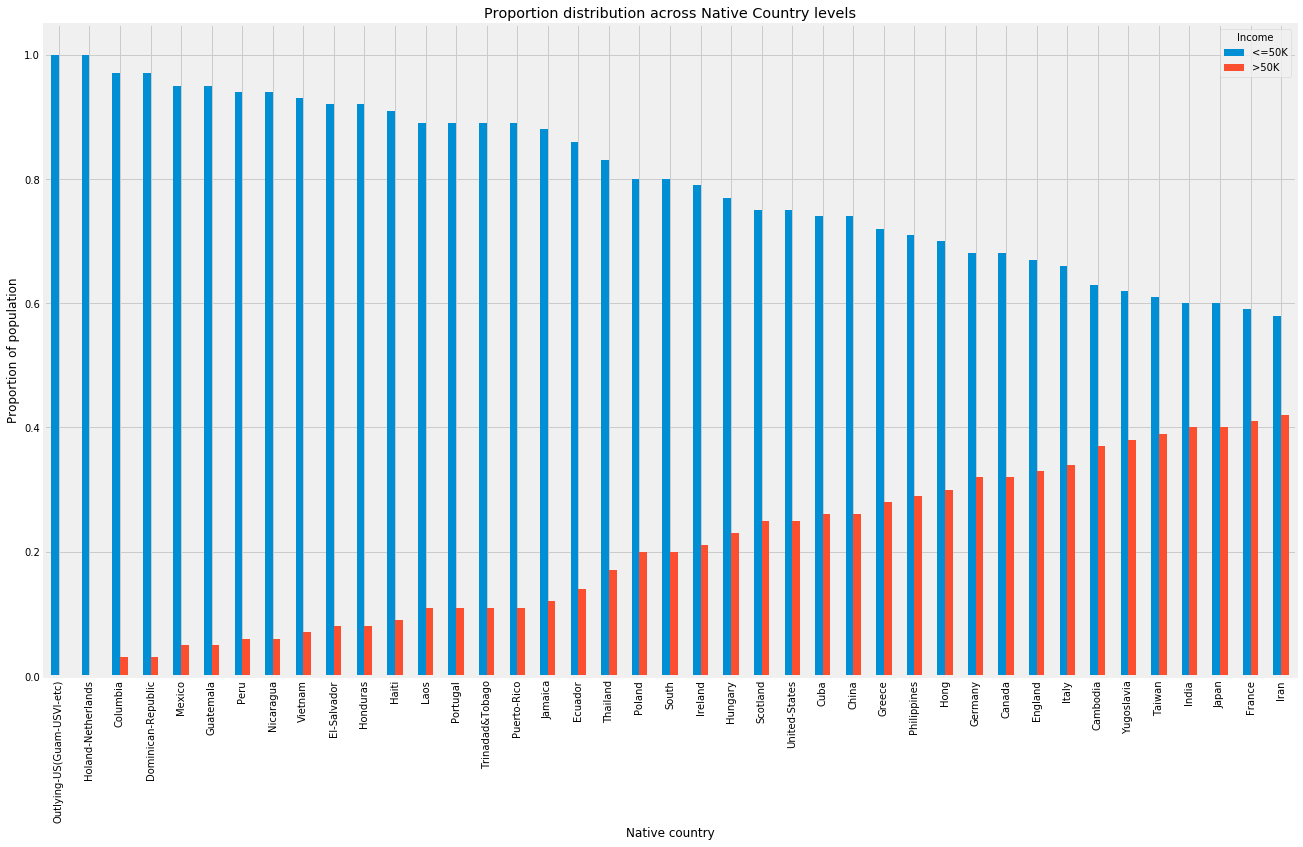

In [22]:
native_country = round(pd.crosstab(df['Native-Country'], df.Income).div(pd.crosstab(df['Native-Country'], df.Income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

## HOURS-PER-WEEK Vs INCOME

Text(0, 0.5, 'Proportion of population')

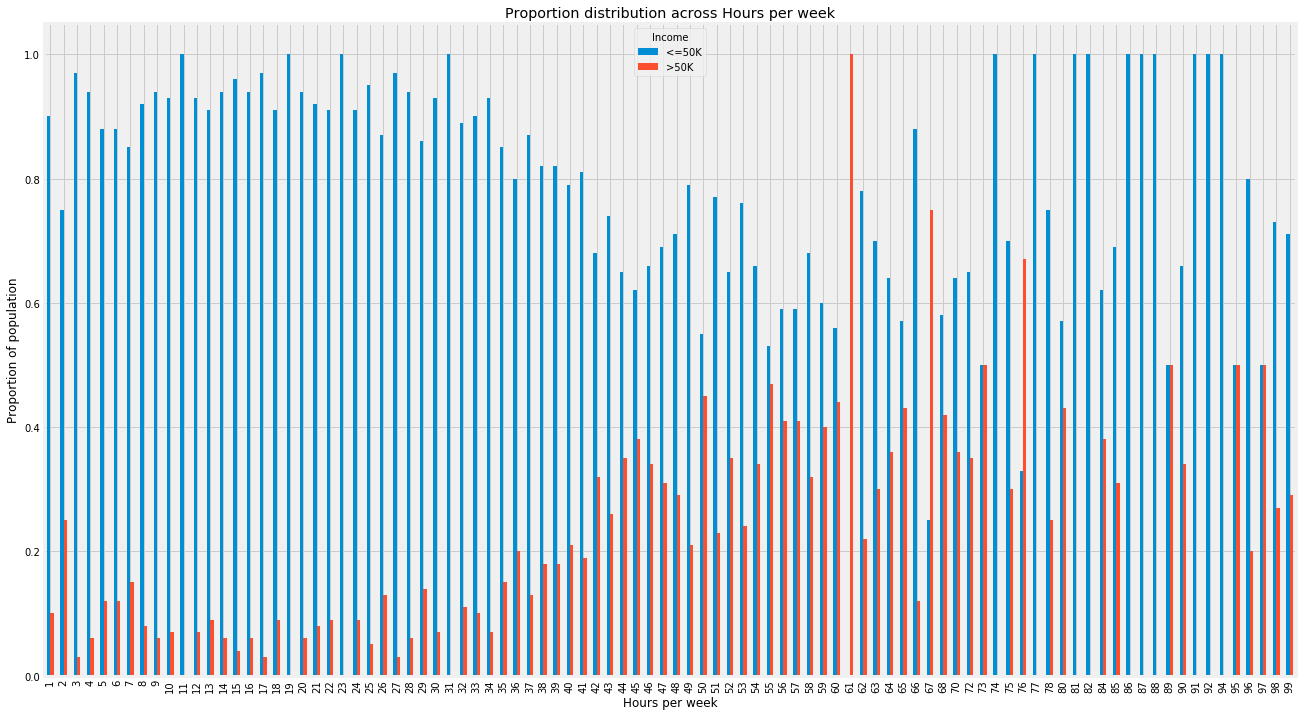

In [23]:
hours_per_week = round(pd.crosstab(df['Hours-Per-Week'], df.Income).div(pd.crosstab(df['Hours-Per-Week'], df.Income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

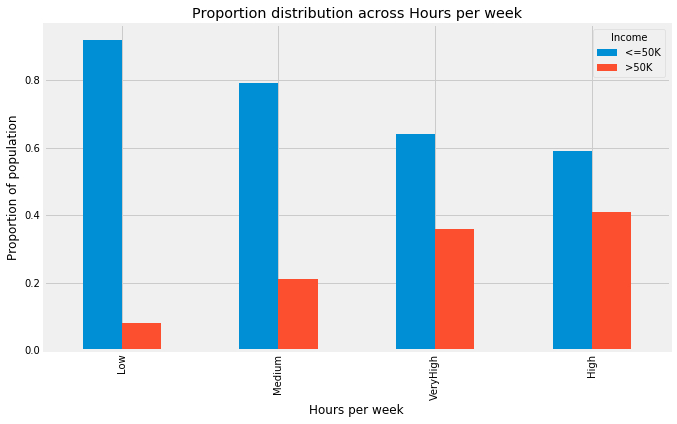

In [24]:
# We are grouping the number of hours per week and visualing the group's income
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(df[var], bin_value, labels=group)
    
bin_var(df, 'Hours-Per-Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(df, 'Hours-Per-Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

hours_per_week = round(pd.crosstab(df['Hours-Per-WeekCat'], df.Income).div(pd.crosstab(df['Hours-Per-WeekCat'], df.Income).apply(sum,1),0),2)

hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

In [25]:
# Finding out the data type of the columns
df.dtypes

Age                     int64
WorkClass              object
FnlWgt                  int64
Education              object
EducationNum            int64
Marital-Status         object
Occupation             object
Relationship           object
Race                   object
Sex                    object
Capital-gain            int64
Capital-loss            int64
Hours-Per-Week          int64
Native-Country         object
Income                 object
Hours-Per-WeekCat    category
dtype: object

In [26]:
# Since the datatype is of Object, converting the data to categorical values using LabelEncoder
import pandas
from sklearn import preprocessing
df_le = df
df_le= df_le.apply(preprocessing.LabelEncoder().fit_transform)
df_le.head()

,Age,WorkClass,FnlWgt,Education,EducationNum,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-Per-Week,Native-Country,Income,Hours-Per-WeekCat
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0,1
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0,2
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0,2
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4,0,2
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0,2


In [27]:
# Now checking out the data type
df_le.dtypes

Age                  int64
WorkClass            int32
FnlWgt               int64
Education            int32
EducationNum         int64
Marital-Status       int32
Occupation           int32
Relationship         int32
Race                 int32
Sex                  int32
Capital-gain         int64
Capital-loss         int64
Hours-Per-Week       int64
Native-Country       int32
Income               int32
Hours-Per-WeekCat    int32
dtype: object

In [28]:
features = df.columns[:-1]
target = ['Income']

       Income
<=50K   24719
>50K     7841


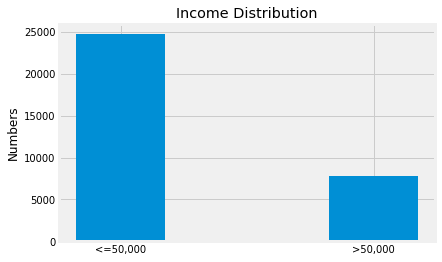

In [29]:
# Analysing the Income Column
label= df['Income'].value_counts().to_frame()

print(label)

N = len(label)
target = label['Income']

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, target, width)

plt.ylabel('Numbers')
plt.title('Income Distribution')
plt.xticks(ind, ('<=50,000', '>50,000'))

plt.show()

## CORRELATION

In [30]:
## Finding out the correlation
correlation = df_le.corr()
correlation

,Age,WorkClass,FnlWgt,Education,EducationNum,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-Per-Week,Native-Country,Income,Hours-Per-WeekCat
Age,1.000000,0.045671,-0.078466,-0.010499,0.036547,-0.266433,-0.010067,-0.263783,0.028751,0.088863,0.125916,0.065058,0.069123,-0.000281,0.234136,-0.015857
WorkClass,0.045671,1.000000,-0.028099,0.010511,0.007487,-0.020999,0.010583,-0.059699,0.048052,0.071294,0.017279,0.007127,0.040072,-0.003962,0.002069,-0.054595
FnlWgt,-0.078466,-0.028099,1.000000,-0.027082,-0.042806,0.030163,-0.000475,0.007005,-0.008964,0.025787,-0.004562,-0.009912,-0.019168,-0.067041,-0.010573,0.021386
Education,-0.010499,0.010511,-0.027082,1.000000,0.359172,-0.038398,-0.042158,-0.010879,0.014135,-0.027349,0.031392,0.016111,0.056295,0.076383,0.079311,-0.025206
EducationNum,0.036547,0.007487,-0.042806,0.359172,1.000000,-0.069338,0.092774,-0.094145,0.031825,0.012256,0.154387,0.084175,0.150098,0.088641,0.335182,-0.115004
Marital-Status,-0.266433,-0.020999,0.030163,-0.038398,-0.069338,1.000000,0.028466,0.185461,-0.068025,-0.129337,-0.075162,-0.035235,-0.192647,-0.021712,-0.199295,0.021278
Occupation,-0.010067,0.010583,-0.000475,-0.042158,0.092774,0.028466,1.000000,-0.044446,-0.007153,0.054694,0.017065,0.012989,0.008358,-0.004476,0.050079,-0.072290
Relationship,-0.263783,-0.059699,0.007005,-0.010879,-0.094145,0.185461,-0.044446,1.000000,-0.116052,-0.582453,-0.093141,-0.064286,-0.251353,-0.010861,-0.250924,0.077153
Race,0.028751,0.048052,-0.008964,0.014135,0.031825,-0.068025,-0.007153,-0.116052,1.000000,0.087197,0.024951,0.019366,0.042318,0.118358,0.071853,-0.082038
Sex,0.088863,0.071294,0.025787,-0.027349,0.012256,-0.129337,0.054694,-0.582453,0.087197,1.000000,0.077573,0.049549,0.231357,0.002231,0.215995,-0.069517


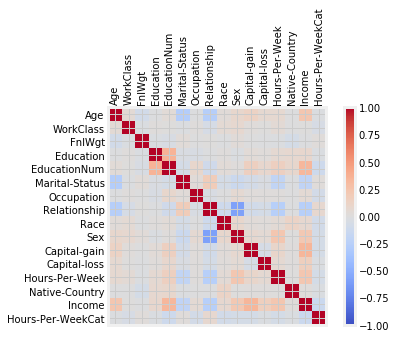

In [31]:
# Visualising the correlation using a heatmap
import matplotlib.pyplot as plt
import numpy

# plot correlation matrix
corr = df_le.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [32]:
df_le.corr().loc['Income']

Age                  0.234136
WorkClass            0.002069
FnlWgt              -0.010573
Education            0.079311
EducationNum         0.335182
Marital-Status      -0.199295
Occupation           0.050079
Relationship        -0.250924
Race                 0.071853
Sex                  0.215995
Capital-gain         0.340034
Capital-loss         0.162511
Hours-Per-Week       0.232394
Native-Country       0.023420
Income               1.000000
Hours-Per-WeekCat   -0.129542
Name: Income, dtype: float64

In [33]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations\n","-"*50)
print(get_top_abs_correlations(df_le, 5))

Top Absolute Correlations
 --------------------------------------------------
Relationship  Sex               0.582453
Education     EducationNum      0.359172
Capital-gain  Income            0.340034
EducationNum  Income            0.335182
Age           Marital-Status    0.266433
dtype: float64


In [34]:
# None of the parameters are highly correlated to each other.

# DATA PREPARATION

In [35]:
import re
# defining the target variable
df['target']=df['Income'].apply(lambda x: x.replace('.', ''))
df['target']=df['target'].apply(lambda x: x.strip())
df['target']=df['target'].apply(lambda x: 1 if x=='>50K' else 0)
df.drop(['Income'], axis=1, inplace=True)

# df['target'] = df['Income']

In [36]:
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(df[var], bin_value, labels=group)
# Education can be divided into three groups 0-6 low and 7-11 medium and above that high
bin_var(df, 'EducationNum', [0,6,11,16], ['Low', 'Medium', 'High'])
bin_var(df, 'EducationNum', [0,6,11,16], ['Low', 'Medium', 'High'])
pd.crosstab(df['EducationNumCat'],df['target'] )

target,0,1
EducationNumCat,,
Low,2494,151
Medium,17266,3516
High,4959,4174


In [37]:
bin_var(df, 'Hours-Per-Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(df, 'Hours-Per-Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
pd.crosstab(df['Hours-Per-WeekCat'],df['target'], margins=True)

target,0,1,All
Hours-Per-WeekCat,,,
Low,6298,582,6880
Medium,12696,3403,16099
High,5019,3452,8471
VeryHigh,706,404,1110
All,24719,7841,32560


In [38]:
# Classifying the occupation into Highly Skilled and low Skilled
occu=pd.crosstab(df['Occupation'],df['target'], margins=True).reset_index()

def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

df['Occupa_cat']=df.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))
df['Occupa_cat'].value_counts()

Lowskill     23507
Highskill     9053
Name: Occupa_cat, dtype: int64

In [39]:
bin_var(df, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

In [40]:
df['Marital Status_cat']=df['Marital-Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')

In [41]:
pd.crosstab(df['Race'],df['target'], margins=True)

target,0,1,All
Race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20698,7117,27815
All,24719,7841,32560


In [42]:
df['Race_cat']=df['Race'].apply(lambda x: x.strip())
df['Race_cat']=df['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')

In [43]:
df.WorkClass.value_counts()

Private             24359
Self-emp-not-inc     2567
Local-gov            2110
State-gov            1305
Self-emp-inc         1117
Federal-gov           981
Never-worked          107
Without-pay            14
Name: WorkClass, dtype: int64

In [44]:
def workclas(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'
df['WorfClass_cat']=df.WorkClass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))

In [45]:
df['WorfClass_cat'].value_counts()

Private     24359
gov          4396
selfempl     3684
others        121
Name: WorfClass_cat, dtype: int64

In [46]:
df.columns

Index(['Age', 'WorkClass', 'FnlWgt', 'Education', 'EducationNum',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-Per-Week', 'Native-Country',
       'Hours-Per-WeekCat', 'target', 'EducationNumCat', 'Occupa_cat',
       'AgeCat', 'Marital Status_cat', 'Race_cat', 'WorfClass_cat'],
      dtype='object')

## Tree based feature selection and random forest classification


In [47]:
# Defining X and Y
X = df.drop(['Education','Occupation','Race','EducationNum','Age', 'Hours-Per-Week', 'Marital-Status','target','WorkClass','Native-Country' ], axis=1)
y = df['target']

In [48]:
str_list=['WorfClass_cat','EducationNumCat', 'AgeCat', 'Race_cat',
'Hours-Per-WeekCat',
 'Marital Status_cat',
 'Occupa_cat',
 'Relationship',
 'Sex']
X=pd.get_dummies(X, columns=str_list)

In [49]:
# Splitting the data into 70%-Train and 30%-Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 0 (0.434258)
2. feature 1 (0.127245)
3. feature 22 (0.067145)
4. feature 2 (0.046847)
5. feature 21 (0.038629)
6. feature 9 (0.027163)
7. feature 23 (0.027036)
8. feature 20 (0.026288)
9. feature 27 (0.021870)
10. feature 11 (0.021605)
11. feature 10 (0.021197)
12. feature 25 (0.017595)
13. feature 17 (0.012763)
14. feature 29 (0.011458)
15. feature 8 (0.010895)
16. feature 26 (0.009915)
17. feature 7 (0.009485)
18. feature 15 (0.009283)
19. feature 28 (0.009059)
20. feature 16 (0.007707)
21. feature 4 (0.007242)
22. feature 3 (0.007113)
23. feature 6 (0.006905)
24. feature 12 (0.005571)
25. feature 14 (0.005075)
26. feature 13 (0.004576)
27. feature 18 (0.003876)
28. feature 24 (0.002032)
29. feature 5 (0.000167)
30. feature 19 (0.000000)


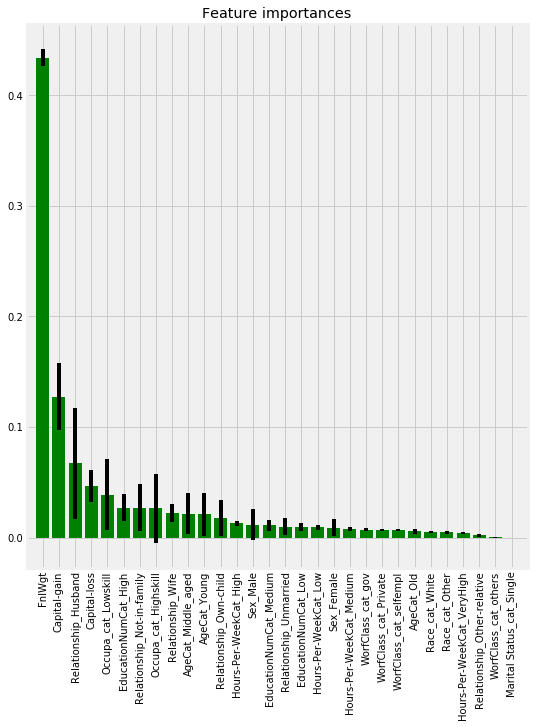

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest Classifier to know the importance of each feature
rand_f = RandomForestClassifier()      
rand_f = rand_f.fit(X_train,y_train)

# Collecting the importances of the features
importance = pd.DataFrame.from_dict({'cols':X_train.columns, 'importance': rand_f.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)

importances = rand_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_f.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [51]:
# Selecting only those features which have an importance of >0.01
imp_cols = importance[importance.importance >= 0.01].cols.values
imp_cols

array(['FnlWgt', 'Capital-gain', 'Relationship_Husband', 'Capital-loss',
       'Occupa_cat_Lowskill', 'EducationNumCat_High',
       'Relationship_Not-in-family', 'Occupa_cat_Highskill',
       'Relationship_Wife', 'AgeCat_Middle_aged', 'AgeCat_Young',
       'Relationship_Own-child', 'Hours-Per-WeekCat_High', 'Sex_Male',
       'EducationNumCat_Medium'], dtype=object)

In [52]:
X = X[imp_cols]
X.head()
X.shape

(32560, 15)

In [53]:
# Splitting the dataset into Train and Test Data as 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X[imp_cols], y, test_size=0.3, random_state=26)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 15)
(9768, 15)
(22792,)
(9768,)


## Feature Importance Without Grouping

In [54]:
# Defining X and Y
X_1 = df.drop(['Hours-Per-WeekCat','target', 'EducationNumCat', 'Occupa_cat','AgeCat', 'Marital Status_cat', 'Race_cat', 'WorfClass_cat'], axis=1)
y_1 = df['target']

In [55]:
X_1.columns

Index(['Age', 'WorkClass', 'FnlWgt', 'Education', 'EducationNum',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-Per-Week', 'Native-Country'],
      dtype='object')

In [56]:
X_1= X_1.apply(preprocessing.LabelEncoder().fit_transform)

In [57]:
# Splitting the data into 70%-Train and 30%-Test Dataset
from sklearn.model_selection import train_test_split
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, test_size=0.3, random_state=26)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2 (0.168566)
2. feature 0 (0.148272)
3. feature 10 (0.116038)
4. feature 4 (0.099018)
5. feature 7 (0.088900)
6. feature 12 (0.083865)
7. feature 5 (0.080086)
8. feature 6 (0.068261)
9. feature 1 (0.039659)
10. feature 11 (0.038447)
11. feature 3 (0.029822)
12. feature 13 (0.015391)
13. feature 8 (0.014221)
14. feature 9 (0.009453)


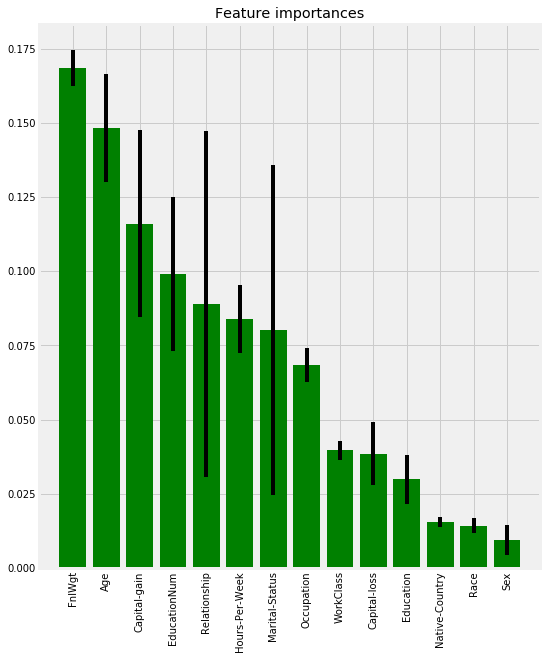

In [58]:
# Building a Random Forest Classifier to know the importance of each feature
rand_f = RandomForestClassifier()      
rand_f = rand_f.fit(X_1train,y_1train)

# Collecting the importances of the features
importances = rand_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_f.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_1train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8,10))
plt.title("Feature importances")
plt.bar(range(X_1train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_1train.shape[1]), X_1train.columns[indices],rotation=90)
plt.xlim([-1, X_1train.shape[1]])
plt.show()

In [59]:
'''
Thus the most important features, in the order of their importances are :

1.FnlWgt 
2.Age 
3.Capital-Gain 
4.EducationNum 
5.Marital-Status 
6.Hours-Per-Week 
7.Relationship 
8.Occupation 
9.WorkClass 
10.Education 
11.Capital-Loss 
12.Native-Country 
13.Race 
14.Sex 

'''

'\nThus the most important features, in the order of their importances are :\n\n1.FnlWgt (0.166709)\n2.Age (0.161482)\n3.Capital-Gain (0.109555)\n4.EducationNum (0.091549)\n5.Marital-Status (0.090297)\n6.Hours-Per-Week (0.089864)\n7.Relationship (0.070703)\n8.Occupation (0.067028)\n9.WorkClass (0.038491)\n10.Education (0.036224)\n11.Capital-Loss (0.035681)\n12.Native-Country (0.015085)\n13.Race (0.014178)\n14.Sex (0.013154)\n\n'

# 1. LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [61]:
# Since the features do not exhibit a linear correlation with Income, we cannot use Linear Regression
# Hence the first algorithm would be logistic regression
# X = df.drop(['Sex','Income'],axis =1)
# y = df['Income']

In [62]:
# # Normalization
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  

# # Fitting only on training data
# scaler.fit(X)  
# train_data = scaler.transform(train_data)  

# # Applying same transformation to test data
# test_data = scaler.transform(test_data)

In [63]:
# Splitting the dataset into Train and Test Data as 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X[imp_cols], y, test_size=0.3, random_state=26)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 15)
(9768, 15)
(22792,)
(9768,)


In [64]:
# Creating the Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

clf_1 = LogisticRegression()
clf_1.fit(X_train, y_train)

# Checking Accuracy 
accuracy = accuracy_score(y_train, clf_1.predict(X_train))
rocauc= roc_auc_score(y_train, clf_1.predict(X_train))


print("Accuracy:",accuracy*100,"%")
print("ROC-AUC Score:",rocauc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 79.84380484380485 %
ROC-AUC Score: 0.6145449033314232


In [65]:
# Making the predictions
y_pred = clf_1.predict(X_test)

In [66]:
# MODEL EVALUATION USING TEST DATA
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

accuracy = accuracy_score(y_test, clf_1.predict(X_test))

rocauc= roc_auc_score(y_test, clf_1.predict(X_test))

confusion_matrix = metrics.confusion_matrix(y_test, clf_1.predict(X_test))

classification_report = metrics.classification_report(y_test, clf_1.predict(X_test))
print("Accuracy Score : ",accuracy)
print("-"*50)
print("ROC_AUC SCORE : ",rocauc)
print("-"*50)
print("CONFUSION MATRIX : \n",confusion_matrix)
print("-"*50)
print("CLASSIFICATION REPORT: \n",classification_report)

Accuracy Score :  0.790950040950041
--------------------------------------------------
ROC_AUC SCORE :  0.6098026704478317
--------------------------------------------------
CONFUSION MATRIX : 
 [[7119  231]
 [1811  607]]
--------------------------------------------------
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      7350
           1       0.72      0.25      0.37      2418

   micro avg       0.79      0.79      0.79      9768
   macro avg       0.76      0.61      0.62      9768
weighted avg       0.78      0.79      0.75      9768



# 2. DECISION TREE

In [67]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [68]:
# Training the Decision Tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

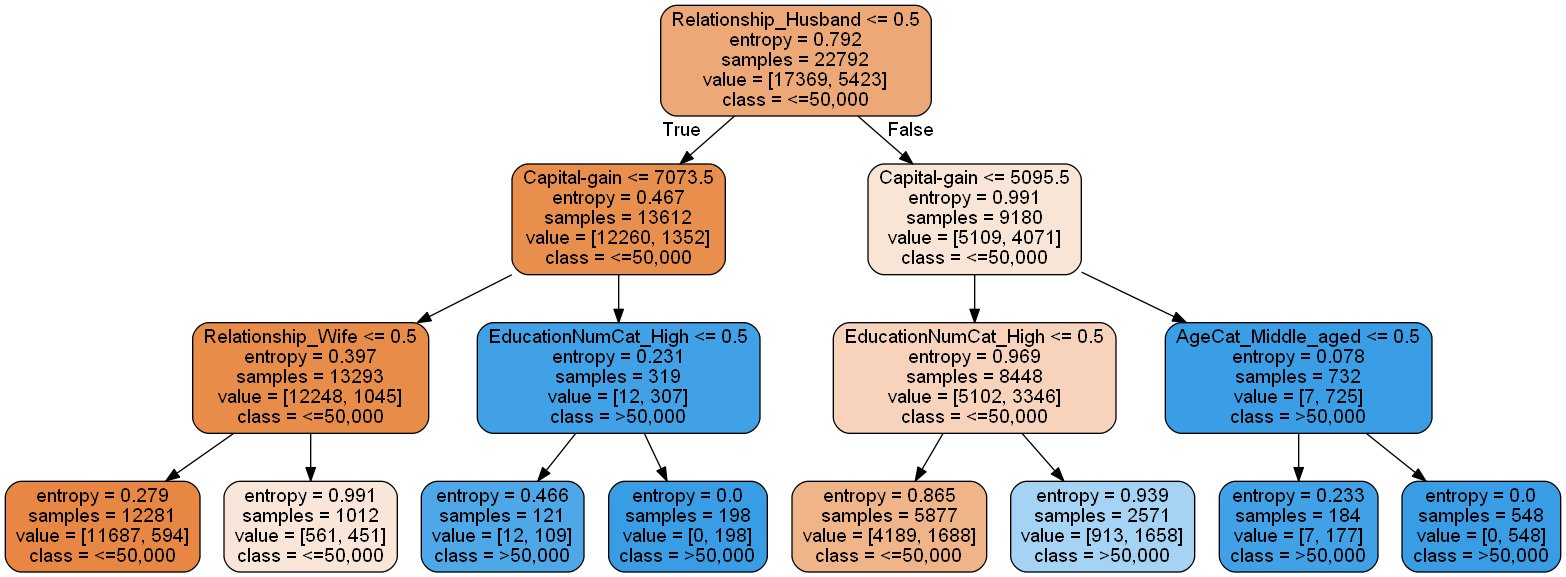

In [69]:
# Visualising the decision tree

features = X_test.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=features,  
                                class_names=['<=50,000','>50,000'])
graph = pydotplus.graph_from_dot_data(dot_data) 



display(Image(graph.create_png()))

In [70]:
# Create PDF
graph.write_pdf("Adult_data.pdf")

# Create PNG
graph.write_png("Adult_data.png")

True

In [71]:
# Evaluation of the Model

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))


accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1589
Accuracy: 0.84


In [72]:
# Validation Using cross_val_score function
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.83082591 0.83691646 0.84213759 0.83230958 0.83906634 0.84029484
 0.83783784 0.84735872 0.8458231  0.83379416]
Average accuracy:  0.8386364547988148


In [73]:
print("The accuracy of the model is:",accuracy*100,"%")

The accuracy of the model is: 83.73259623259624 %


# 3. K-NEAREST NEIGHBOR(KNN) 

In [74]:
# Before using the KNN Algorithm we need to select an appropriate value for K
# creating odd list of K for KNN
    
myList = list(range(50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

In [75]:
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append((k,scores.mean()))
    
cv_scores

[(1, 0.7250792225934797),
 (3, 0.7581166619370872),
 (5, 0.7762370864121029),
 (7, 0.7862411088468868),
 (9, 0.792646128051162),
 (11, 0.7955857637920676),
 (13, 0.7983940131593591),
 (15, 0.8006757350111855),
 (17, 0.8005880060840351),
 (19, 0.8011583162047586),
 (21, 0.8014213970345244),
 (23, 0.8011142158880634),
 (25, 0.8008509906417041),
 (27, 0.8001489668070303),
 (29, 0.7992276736387713),
 (31, 0.7983940323749165),
 (33, 0.7982625112093839),
 (35, 0.7974727007164049),
 (37, 0.7970778484246377),
 (39, 0.7966830731344962),
 (41, 0.7961565841430767),
 (43, 0.7954545988240003),
 (45, 0.7949280520718572),
 (47, 0.7944454901065139),
 (49, 0.7940944685645018)]

In [76]:
# '''
# Since the highest accuracy is achieved for k=7, we take the value of k to be 7
# '''
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)
# Training the model
knn.fit(X_train, y_train)
# Predicting the values
y_pred = knn.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy = metrics.accuracy_score(y_test, y_pred)

In [78]:
# evaluate accuracy

from sklearn.metrics import confusion_matrix, classification_report 
print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))

[[6992  358]
 [1789  629]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7350
           1       0.64      0.26      0.37      2418

   micro avg       0.78      0.78      0.78      9768
   macro avg       0.72      0.61      0.62      9768
weighted avg       0.76      0.78      0.74      9768



In [79]:
print("The accuracy of the model is:",accuracy*100,"%")

The accuracy of the model is: 78.02006552006551 %


# 4. NAIVE BAYES

## 4.1 BERNOULLI NB

In [80]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

# Training the model
model.fit(X_train,y_train)

# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test

# Evaluating the accuracy of the model
accuracy =  metrics.accuracy_score(expected, predicted)
print("The accuracy of the model is:",accuracy*100,"%")

The accuracy of the model is: 81.1015561015561 %


## 4.2 MULTINOMIAL NB

In [81]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Training the model
model.fit(X_train,y_train)

# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test

# Evaluating the accuracy of the model
accuracy =  metrics.accuracy_score(expected, predicted)
print("The accuracy of the model is:",accuracy*100,"%")

The accuracy of the model is: 77.94840294840296 %


## 4.3 GAUSSIAN NB

In [82]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Training the model
model.fit(X_train,y_train)

# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = y_test


# Evaluating the accuracy of the model
accuracy =  metrics.accuracy_score(expected, predicted)
print("The accuracy of the model is:",accuracy*100,"%")

The accuracy of the model is: 78.69574119574119 %


# 5. RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestClassifier
# Building the model
rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)

#Training the model 
rf.fit(X_train, y_train)

# Predicting the values using the model
y_pred = rf.predict(X_test)

# Evaluating the model using R-Squared Value
from sklearn.metrics import r2_score
print("R-Squared Value:",r2_score(y_test, y_pred))

# Finding the ROC_AUC score
from sklearn.metrics import roc_auc_score
print("ROC-AUC Score: ",roc_auc_score(y_test, y_pred))

# Finding the accuracy
accuracy = rf.score(X_test, y_test)
print("The accuracy of the model is:",accuracy*100,"%")

R-Squared Value: -0.015146942151550435
ROC-AUC Score:  0.7365697743117098
The accuracy of the model is: 81.0913185913186 %


# 6. BAGGED DECISION TREES

In [84]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Taking the base estimator as Decision Tree Classifier
clf = DecisionTreeClassifier()
num_trees = 10

# Building the Bagging Model
model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed)

# Evaluating the performance of the model
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("The accuracy of the model is:",results.mean()*100,"%")

The accuracy of the model is: 82.28501228501229 %


# 7. XGBOOST

In [85]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

# Defining the parameters to be passed into XGBClassifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}

# Training the Model
bst = XGBClassifier(**params).fit(X_train, y_train)

# Predicting using the model
preds = bst.predict(X_test)

acc = accuracy_score(y_test, preds)


print('Accuracy: ', acc*100, '%')
print('Error: {0:.4f}'.format(1-acc))

Accuracy:  84.5004095004095 %
Error: 0.1550


## COMPARISION OF MODEL PERFORMANCES

In [86]:
# Looking at the accuracies of the models, we canconclude that XGBoost is the best algorithm, 
# followed by the Decision Tree Algorithm.